In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 1. Data Collection (Simulating Random Data)
n_samples = 500
n_features = 5
np.random.seed(42)
X = np.random.rand(n_samples, n_features) * 10  # Feature range adjustment
y = np.random.choice(["Class A", "Class B"], size=n_samples)
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
data['Target'] = y

In [3]:
# 2. Preprocessing
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])  # Encode categorical target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['Target']))

In [4]:
# 3. Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, data['Target'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# 4. Choose Naïve Bayes Variant
nb_model = GaussianNB()  # Change to MultinomialNB() or BernoulliNB() based on data type
nb_model.fit(X_train, y_train)

GaussianNB()

In [6]:
# 6. Compute Predictions
y_pred = nb_model.predict(X_test)

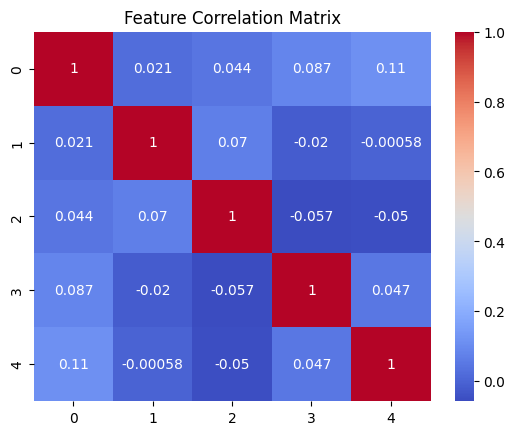

In [7]:
# 7. Validate Assumptions (Checking feature independence using correlation matrix)
corr_matrix = pd.DataFrame(X_train).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
# 8. Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        39
           1       0.50      0.36      0.42        36

    accuracy                           0.52        75
   macro avg       0.52      0.51      0.51        75
weighted avg       0.52      0.52      0.51        75



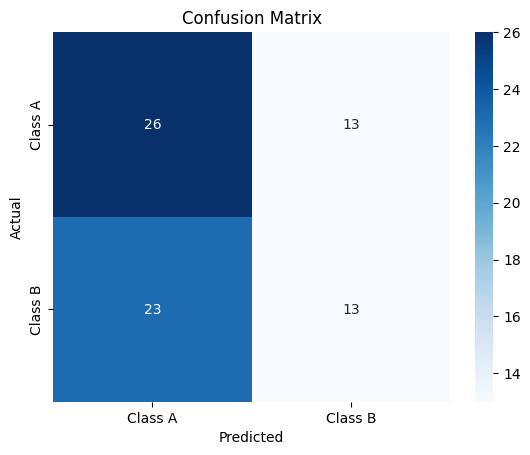

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# 9. Predict New Data
new_data_df = pd.DataFrame(new_data, columns=[f'Feature_{i+1}' for i in range(n_features)])
new_data_scaled = scaler.transform(new_data_df)
new_prediction = nb_model.predict(new_data_scaled)
print("\nPredicted Class for New Data:", label_encoder.inverse_transform(new_prediction))


Predicted Class for New Data: ['Class A']
